In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

#import sys
#sys.path.append('../utils')
#import prepro

In [6]:
csv_folder = '../data/modeling/train/clustered/clust0/daily/'
csv_files = [csv for csv in os.listdir(csv_folder) if csv.endswith('.csv')]

daily = []

for file in csv_files:
    new = pd.DataFrame()
    # import DataFrame
    df = pd.read_csv('../data/modeling/train/clustered/clust0/daily/' + file)
    new = df[['time_stamp', 'inter_pol']]
    new.set_index('time_stamp', inplace = True)

    daily.append(new)

In [7]:
#test for stionarity
for df in daily:
    adf_test = ADFTest(alpha = 0.05)
    print(adf_test.should_diff(df))

(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)
(0.01, False)


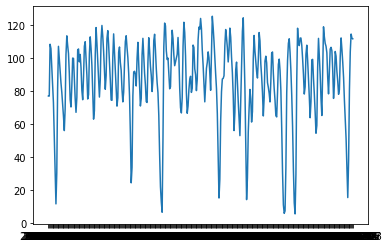

In [8]:
plt.plot(daily[0])

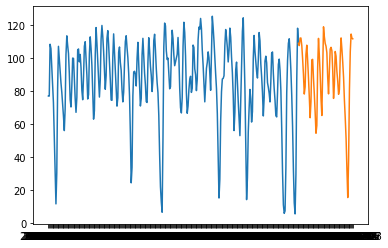

In [63]:
train = daily[0][:300]
test = daily[0][-66:]

plt.plot(train)
plt.plot(test)

In [65]:
arima_model = auto_arima(train,start_p=5,d=1,start_q=5,
          max_p=20,max_d=20,max_q=20, start_P=5,
          D=1, start_Q=5, max_P=20,max_D=20,
          max_Q=20, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=100)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [64]:
arima_model = auto_

Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2493.904, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2400.849, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2275.303, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2491.918, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2270.152, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2261.452, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2291.336, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2252.986, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2293.144, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2229.131, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2237.383, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2224.109, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2235.238, Time=0.22 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : 

In [60]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -1062.448
Date:                Tue, 13 Jul 2021   AIC                           2138.897
Time:                        00:57:34   BIC                           2164.562
Sample:                             0   HQIC                          2149.181
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0239      0.082      0.293      0.769      -0.136       0.184
ar.L2         -0.1874      0.080     -2.351      0.019      -0.344      -0.031
ar.L3         -0.2115      0.087     -2.434      0.015      -0.382      -0.041
ar.L4         -0.2139      0.077     -2.778      0.005      -0.365      -0.063
ar.L5         -0.2423      0.069     -3.512      0.000      -0.378      -0.107
ma.L1          0.9020      0.059     15.346      0.000       0.787       1.017
sigma2        90.5831      6.429     14.091      0.000      77.983     103.183
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                20.58
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.48
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred = pd.DataFrame(arima_model.predict(n_periods = 75), index = test.index)
pred.columns = ['predicted_heigth']
pred.head(5)

,predicted_heigth
time_stamp,
2021-02-23,94.674403
2021-02-24,88.454877
2021-02-25,88.645007
2021-02-26,92.813250
2021-02-27,98.118809


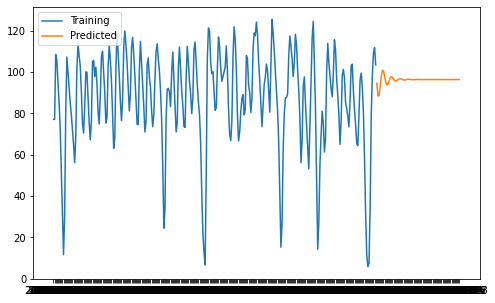

In [62]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(pred, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
for t